# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
%matplotlib inline

# Importing Dataset

In [2]:
df=pd.read_csv("India Covid Vaccination.csv")
df

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,India,1/15/2021,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0,NaN
1,India,1/16/2021,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0,NaN
2,India,1/17/2021,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0,NaN
3,India,1/18/2021,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0,NaN
4,India,1/19/2021,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0,NaN
...,...,...,...,...,...,...,...,...
786,India,4/4/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",https://dashboard.cowin.gov.in/,2206587295,1027400434,951962050,227224811.0
787,India,4/5/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",https://dashboard.cowin.gov.in/,2206589359,1027400717,951962669,227225973.0
788,India,4/6/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",https://dashboard.cowin.gov.in/,2206591315,1027400981,951963255,227227079.0
789,India,4/7/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",https://dashboard.cowin.gov.in/,2206593723,1027401241,951963793,227228689.0


In [3]:
df.shape

(791, 8)

In [4]:
df.size

6328

# Selecting the features we are going to use

In [5]:
cols_to_use = ["date","vaccine","total_vaccinations","people_vaccinated","people_fully_vaccinated"]
df = df[cols_to_use]
df

,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,1/15/2021,"Covaxin, Oxford/AstraZeneca",0,0,0
1,1/16/2021,"Covaxin, Oxford/AstraZeneca",191181,191181,0
2,1/17/2021,"Covaxin, Oxford/AstraZeneca",224301,224301,0
3,1/18/2021,"Covaxin, Oxford/AstraZeneca",454049,454049,0
4,1/19/2021,"Covaxin, Oxford/AstraZeneca",674835,674835,0
...,...,...,...,...,...
786,4/4/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",2206587295,1027400434,951962050
787,4/5/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",2206589359,1027400717,951962669
788,4/6/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",2206591315,1027400981,951963255
789,4/7/2023,"Corbevax, Covaxin, Novavax, Oxford/AstraZeneca...",2206593723,1027401241,951963793


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     791 non-null    object
 1   vaccine                  791 non-null    object
 2   total_vaccinations       791 non-null    int64 
 3   people_vaccinated        791 non-null    int64 
 4   people_fully_vaccinated  791 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 31.0+ KB


In [7]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,7.910000e+02,7.910000e+02,7.910000e+02
mean,1.373852e+09,7.287644e+08,5.734902e+08
std,8.208192e+08,3.742329e+08,3.891323e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.167904e+08,4.018771e+08,1.149133e+08
50%,1.768597e+09,9.648185e+08,7.851726e+08
75%,2.167846e+09,1.025881e+09,9.467446e+08
max,2.206595e+09,1.027401e+09,9.519641e+08


In [8]:
df[cols_to_use].nunique()

date                       791
vaccine                      4
total_vaccinations         791
people_vaccinated          791
people_fully_vaccinated    763
dtype: int64

# Looking for duplicate

In [9]:
df.duplicated().sum()

0

#### As there are no duplicates found there is no need to treat the duplicate values.

# Looking for Outliers

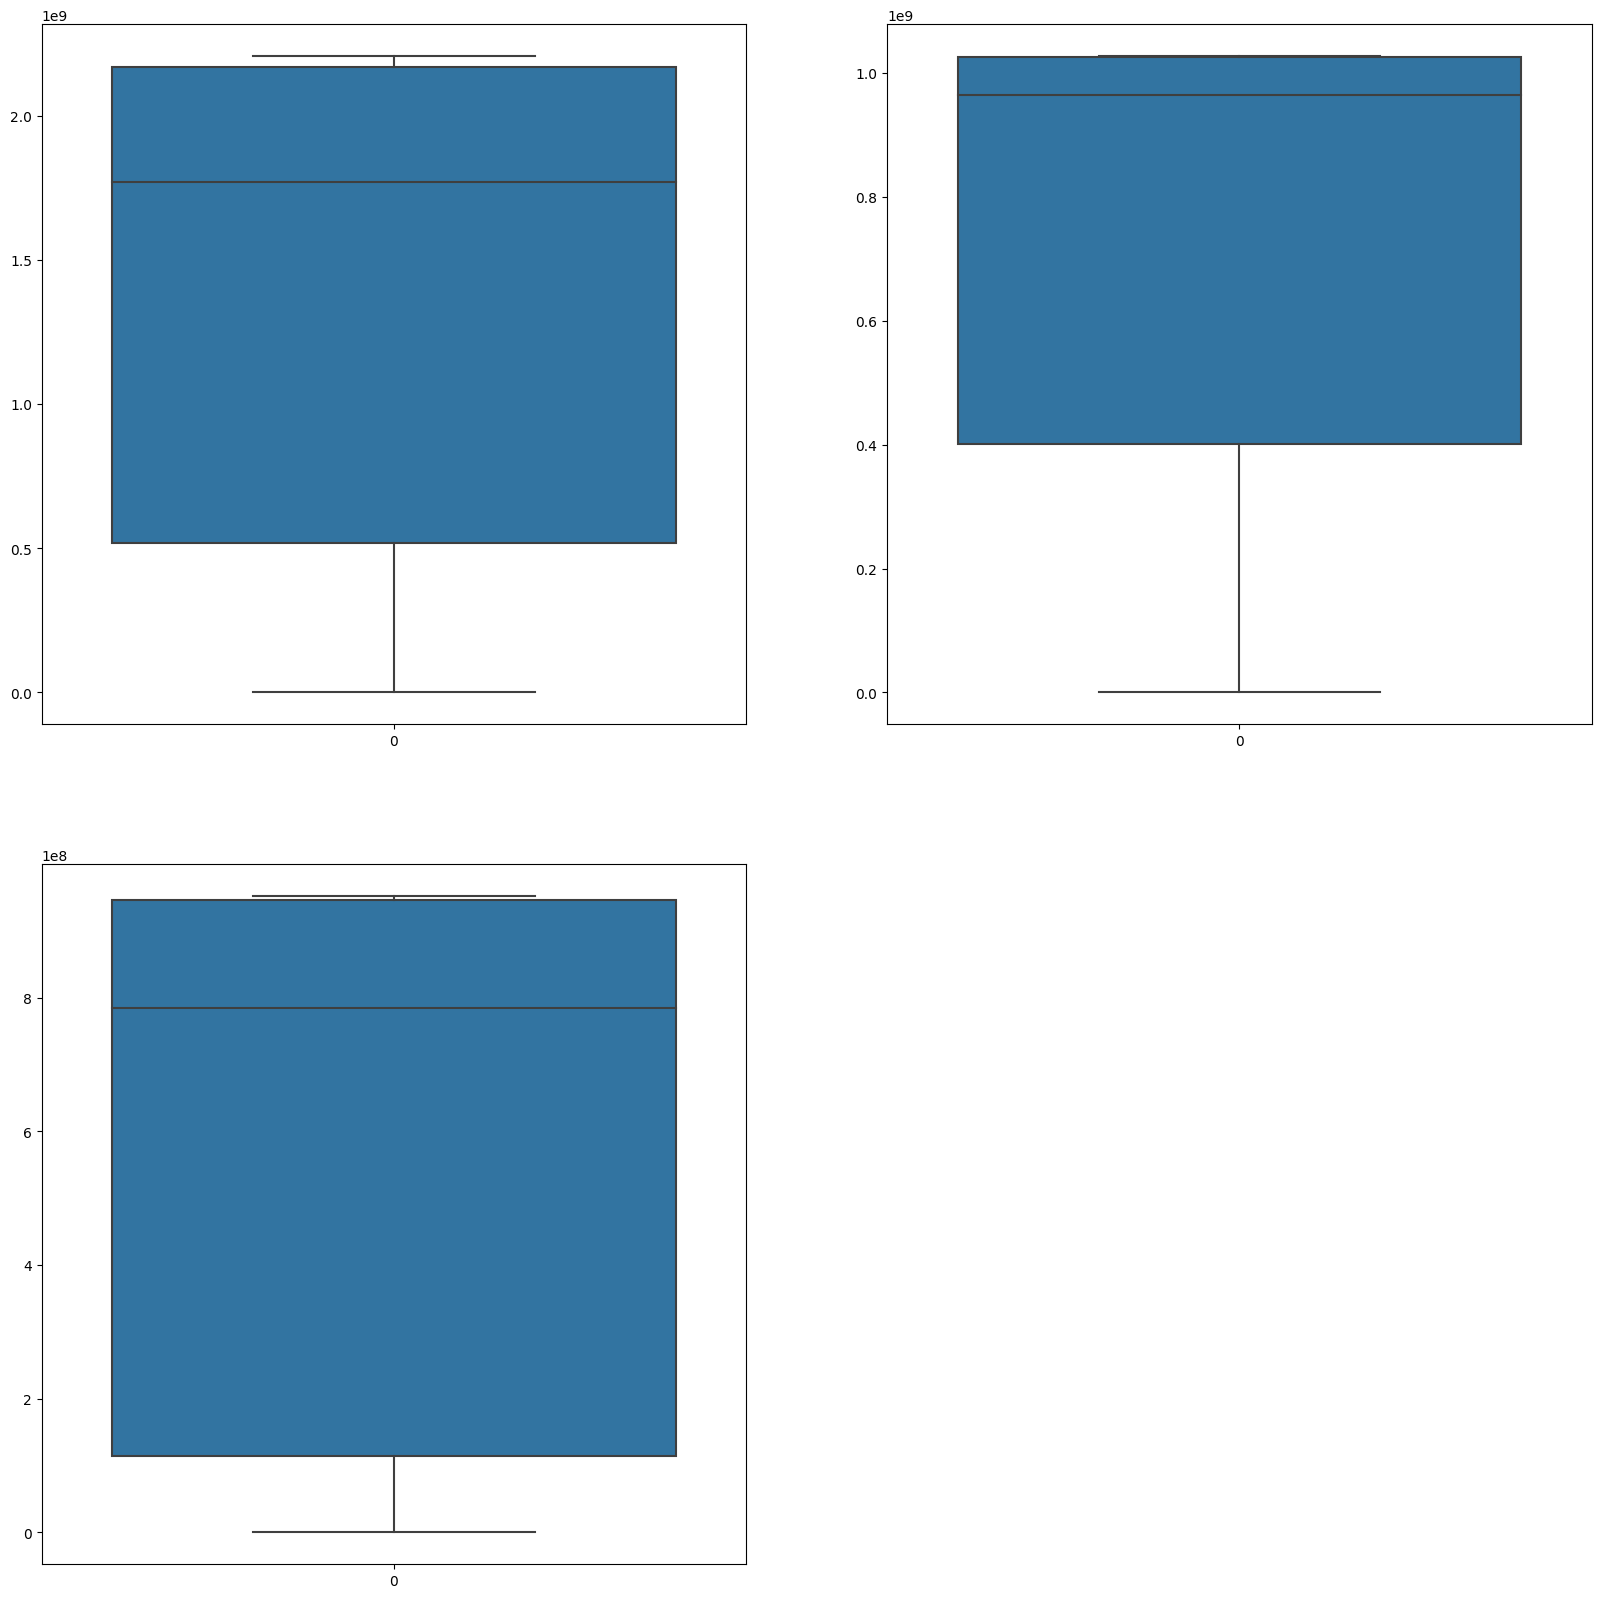

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(df["total_vaccinations"])
plt.subplot(2,2,2)
sns.boxplot(df["people_vaccinated"])
plt.subplot(2,2,3)
sns.boxplot(df["people_fully_vaccinated"])
plt.show()

# Insights:
Here we can see that no outliers are found in the selected columns of the dataset

# Data Visualization

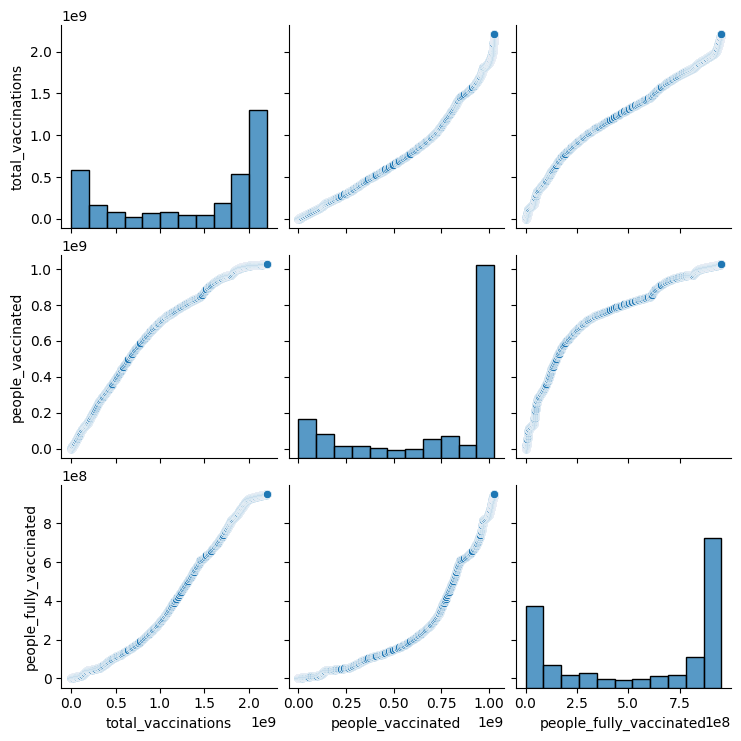

In [11]:
sns.pairplot(df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Covaxin, Oxford/AstraZeneca'),
  Text(1, 0, 'Covaxin, Oxford/AstraZeneca, Sputnik V'),
  Text(2, 0, 'Corbevax, Covaxin, Oxford/AstraZeneca, Sputnik V'),
  Text(3, 0, 'Corbevax, Covaxin, Novavax, Oxford/AstraZeneca, Sputnik V')])

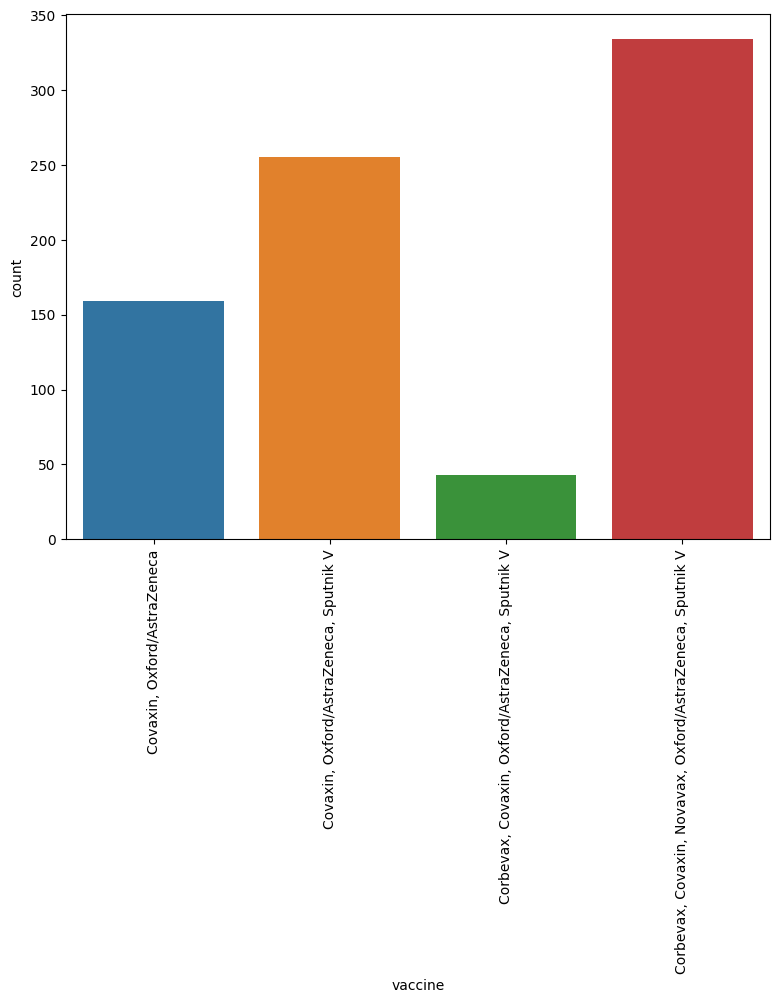

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data=df, x="vaccine")
plt.xticks(rotation=90)

### Here we can see that the last category which has red color has the largest count comparing to the other three categories

# Encoding

### as we can see there are multipe categorical columns. 
### for this we use label and onehot encoding

In [13]:
le=LabelEncoder()
df["vaccine"]=le.fit_transform(df["vaccine"])

In [14]:
df

,date,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,1/15/2021,2,0,0,0
1,1/16/2021,2,191181,191181,0
2,1/17/2021,2,224301,224301,0
3,1/18/2021,2,454049,454049,0
4,1/19/2021,2,674835,674835,0
...,...,...,...,...,...
786,4/4/2023,0,2206587295,1027400434,951962050
787,4/5/2023,0,2206589359,1027400717,951962669
788,4/6/2023,0,2206591315,1027400981,951963255
789,4/7/2023,0,2206593723,1027401241,951963793


# Correlation

<AxesSubplot: >

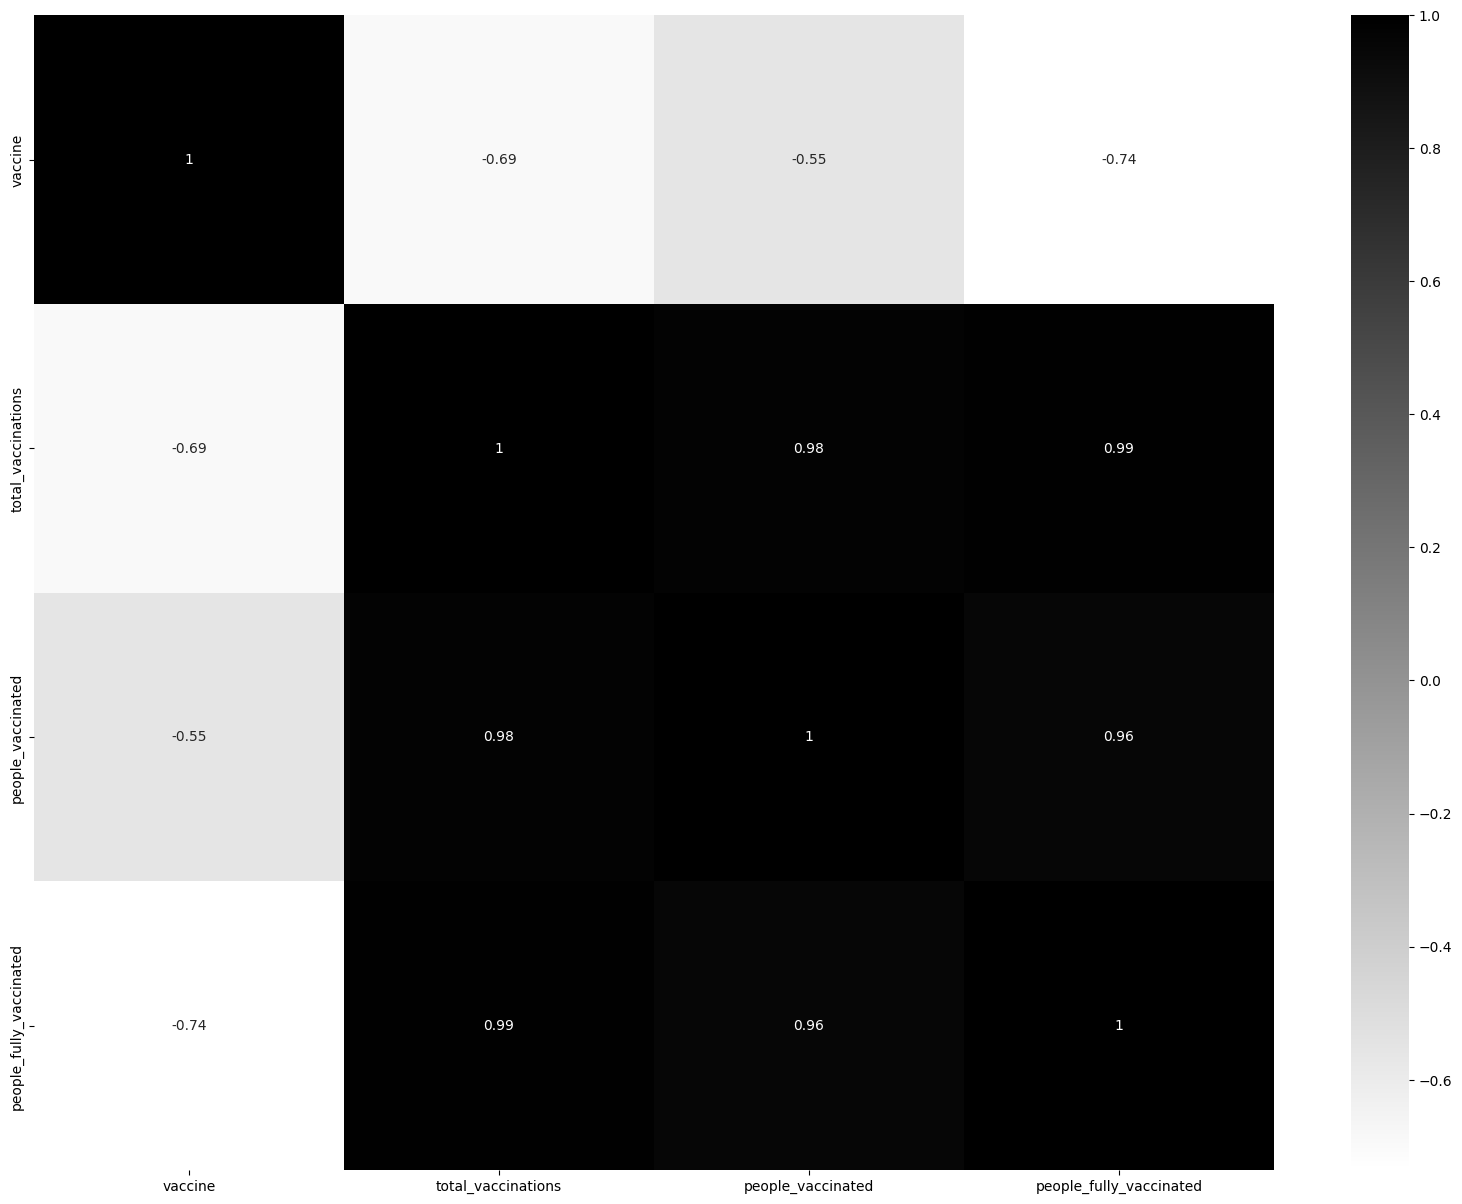

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="gray_r")

In [16]:
cols_to_use = ["vaccine","total_vaccinations","people_vaccinated","people_fully_vaccinated"]
df = df[cols_to_use]
df

,vaccine,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,2,0,0,0
1,2,191181,191181,0
2,2,224301,224301,0
3,2,454049,454049,0
4,2,674835,674835,0
...,...,...,...,...
786,0,2206587295,1027400434,951962050
787,0,2206589359,1027400717,951962669
788,0,2206591315,1027400981,951963255
789,0,2206593723,1027401241,951963793


# Train Test Split

In [17]:
x=df.drop("vaccine",axis=1)
y=df["vaccine"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.700,random_state=100)

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
x_train.shape

(553, 3)

In [20]:
x_test.shape

(238, 3)

# Model Building

# 1. Decision Tree

In [21]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [22]:
y_pred = dtc.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

0.9957983193277311

# 2. KNN

In [24]:
knn=KNeighborsClassifier()

In [25]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [26]:
accuracy_score(y_test,y_pred)

0.9915966386554622

# 3. SVM

In [27]:
svm=SVC(kernel="linear")

In [28]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [29]:
y_pred=svm.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9495798319327731

# 4. Random Forest

In [31]:
rfc=RandomForestClassifier(criterion='entropy')

In [32]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [33]:
y_pred_rfc=rfc.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred_rfc)

0.9957983193277311

# 5. Logistic Regression

In [35]:
lreg=LogisticRegression()

In [36]:
lreg.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=lreg.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.9327731092436975

# 6. Adaboost

In [39]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [40]:
y_pred = ada.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred)

0.9327731092436975

# Accuracies of all Models are
Logistic Regression = 0.9327731092436975

##### Decision Tree = 0.9957983193277311

##### Random Forest = 0.9957983193277311

Adaboost = 0.9327731092436975

KNN = 0.9915966386554622

SVM = 0.9495798319327731

# As we can see we got two highest Accuracies which are for Decision Tree and Random Forest